$\Large\textbf{Lab 3.}$ $\large\textbf{Exercise 2.}$



Consider the problem $\min_{\mathbf{x}}{q(\mathbf{x})} = q(x_1,x_2) = 512(x_2 - x_1^2)^2 + (4 - x_1)^2$. 

In [1]:
import numpy as np 

#method to find Hessian matrix
def evalh(x): 
  assert type(x) is np.ndarray 
  assert len(x) == 2
  a11 = 6144.*(x[0])**2 - 2048.*x[1] + 2.
  a12 = -2048.*x[0]
  a21 = -2048.*x[0]
  a22 = 1024.
  return np.array([[a11, a12], [a21, a22]])

#method to find the condition number of any square matrix
def find_condition_number(A):
  assert type(A) is np.ndarray
  assert A.shape[0] == A.shape[1]
  return np.linalg.cond(A, p=None)

Note that the update step in the modified gradient descent scheme uses a scaled gradient. Thus it becomes important to set up some criteria for choosing the $\mathbf{D}^k$ matrix in every iteration. In this exercise, we will assume $\mathbf{D}^k$ to be a diagonal matrix. The following questions will help in designing a suitable $\mathbf{D}^k$.

$\textbf{Question 1:}$ $\min_{\mathbf{x}}{q(\mathbf{x})} = q(x_1,x_2) = 512(x_2 - x_1^2)^2 + (4 - x_1)^2$.

We design a suitable diagonal matrix $\textbf{D}^k$ for gradient descent algorithm with scaling to solve $\min_{\mathbf{x}}{q(\mathbf{x})}$. We use this $\textbf{D}^k$ in the implementation of Algorithm 1 (with backtracking
line search) to find the minimizer of $q(\mathbf{x})$ with starting point $\mathbf{x}^0 = (8,8)$ and $\tau = 10^{-5}.$


Diagonal approximation to the Hessian matrix $\nabla^2f( \mathbf{x})$, i.e., the diagonal matrix $\mathbf{D}^k$ that has the inverse second partial derivatives $\Big(\frac{\partial^2f(\mathbf{x_k})}{(\partial x_i)^2}\Big)^{-1}$ along the diagonal. This improves the performance of the gradient method dramatically, by providing automatic scaling of the units in which the components $x_i$ of $\mathbf{x}$ are measured. Because of such choice of $\mathbf{D}^k$, the condition number of $\mathbf{Q}$ is improving and becoming so close to $1$ so that our gradient descent scheme is converging so quickly. Here, product with inverse of diagonal elements of hessian matrix with hessian matrix is causing the improvements in $\mathbf{Q}$ by becoming so close to condition number of identity matrix. This is so helpful in fasterness of the algorithm.

If we choose diagonal elements of $\mathbf{D^k}$ by taking diagonal elements of hessian and invert them then such choice of $\mathbf{D^k}$ will help to reduce conditional number of a system. Hessian of $q(\mathbf{x})$ can be written as;

$\nabla^2q(\mathbf{x}) =
\begin{bmatrix}
  6144x_1^2 - 2048x_2 + 2 & -2048x_1 \\ -2048x_1 & 1024
\end{bmatrix}$


The diagonal matrix $\mathbf{D}^k$ that has the inverse second partial derivatives $\Big(\frac{\partial^2f(\mathbf{x_k})}{(\partial x_i)^2}\Big)^{-1}$ along the diagonal.


$\therefore \mathbf{D^k}$ can be written as;



$\therefore \mathbf{D^k} =
\begin{bmatrix}
  \frac{1}{6144x_1^2 - 2048x_2 + 2 } & 0 \\ 0 & \frac{1}{1024}
\end{bmatrix}$

In [2]:
#The method defines a way to construct D_k matrix used in scaling the gradient in the modified gradient descent scheme
def compute_D_k_diagonal(x):
  assert type(x) is np.ndarray
  assert len(x) == 2
  A = evalh(x)
  B = np.array([[1/A[0][0], 0], [0, 1/A[1][1]]])
  return B

In [3]:
#Now we will define a function which will compute and return the function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  #compute the function value and return it 
  return 512 * (x[1] - x[0]**2)**2 + (4 - x[0])**2

In [4]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  #compute the gradient value and return it 
  a = -2048 * x[0] * (x[1] - x[0]**2) - (2 * (4 - x[0]))
  b = 1024 * (x[1] - x[0]**2)
  return np.array([a, b])

In [5]:
#Complete the module to compute the steplength by using the closed-form expression
def compute_steplength_backtracking(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 
  alpha = alpha_start
  p = - gradf
  #implement the backtracking line search
  #print(evalf(x + alpha*p), evalf(x) + gamma * alpha* (np.matmul(np.matrix.transpose(p), p) ))
  while evalf(x + alpha*p) > evalf(x) + gamma * alpha* (np.matmul(np.matrix.transpose(gradf), p) ):
    alpha = alpha * rho
  return alpha
  #Complete the code 
  
  

In [6]:
def compute_steplength_backtracking_scaled_direction(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  #assert type(direction) is np.ndarray and len(direction) == 2 
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 
  alpha = alpha_start
  p = - gradf
  D_k = compute_D_k_diagonal(x)
  #implement the backtracking line search
  #print(evalf(x + alpha*p), evalf(x) + gamma * alpha* (np.matmul(np.matrix.transpose(p), p) ))
  while evalf(x + alpha*np.matmul(D_k,p)) > evalf(x) + gamma * alpha* (np.matmul(np.matrix.transpose(gradf), np.matmul(D_k,p)) ):
    alpha = alpha * rho
  return alpha  
  
  #Complete the code 

In [7]:
#line search type 
EXACT_LINE_SEARCH = 1
BACKTRACKING_LINE_SEARCH = 2
CONSTANT_STEP_LENGTH = 3

In [8]:
#complete the code for gradient descent to find the minimizer
def find_minimizer_gd(start_x, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  x = start_x
  g_x = evalg(x)
  A = evalh(x)/2
  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    #print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)
  condition_number_array = []
  k = 0
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    condition_number_array.append(find_condition_number(evalh(x)))
    if line_search_type == EXACT_LINE_SEARCH:
      step_length = compute_steplength_exact(g_x, A) #call the new function you wrote to compute the steplength
      #raise ValueError('EXACT LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x, g_x, alpha_start, rho, gamma) #call the new function you wrote to compute the steplength
      #raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 0.1
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here  
    x = np.subtract(x, np.multiply(step_length, g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point
  return x, k, condition_number_array
  #Complete the code   


In [9]:
#complete the code for gradient descent with scaling to find the minimizer

def find_minimizer_gdscaling(start_x, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  x = start_x
  g_x = evalg(x)
  #A = evalh(x)/2
  
  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    #print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

  k = 0
  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    D_k = compute_D_k_diagonal(x)
    if line_search_type == EXACT_LINE_SEARCH:
      step_length = compute_steplength_exact(g_x, A) #call the new function you wrote to compute the steplength
      #raise ValueError('EXACT LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking_scaled_direction(x, g_x, alpha_start, rho, gamma) #call the new function you wrote to compute the steplength
      #raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 0.1
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here  
    x = np.subtract(x, np.multiply(step_length,np.matmul(D_k, g_x))) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point
  return x, k
  #Complete the code   

In [10]:
my_start_x = np.array([8.,8.])
my_tol= 1e-5

In [11]:
#check gradient descent with backtracking line search 
alpha_start = 1.
rho = 0.5
gamma = 0.5
print("\nUsing Gradient descent with Backtracking Line Search")
#check what happens when you call find_minimzer using backtracking line search
x_opt_bls, k, p = find_minimizer_gd(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, alpha_start, rho, gamma)
print("Minimizer: {}, Minimum function value: {}".format((x_opt_bls[0], x_opt_bls[1]), evalf(x_opt_bls)),"\nNo. of Iterations:", k)


Using Gradient descent with Backtracking Line Search
Minimizer: (3.9999597839949743, 15.999678263984114), Minimum function value: 1.6173741774296086e-09 
No. of Iterations: 902339


In [12]:
#check gradient descent with scaling and backtracking line search 
alpha_start = 1.
rho = 0.5
gamma = 0.5
print("\nUsing Gradient descent with scaling and Backtracking Line Search")
#check what happens when you call find_minimzer using backtracking line search
x_opt_bls, k = find_minimizer_gdscaling(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, alpha_start, rho, gamma)
print("Minimizer: {}, Minimum function value: {}".format((x_opt_bls[0], x_opt_bls[1]), evalf(x_opt_bls)),"\nNo. of Iterations:", k)


Using Gradient descent with scaling and Backtracking Line Search
Minimizer: (4.000009925130873, 16.00007940235738), Minimum function value: 9.850897480037126e-11 
No. of Iterations: 904703


When we compare gradient descent (without scaling) with backtracking line search with gradient descent (with scaling) with backtracking line search, the minimizers, the minimum function value and the number of iterations taken are as follows:


**With Scaling:**

Minimizer: $(4.000009925130873, 16.00007940235738)$

Minimum function value: $9.850897480037126e-11 $

No. of Iterations: $904703$

**Without Scaling:**

Minimizer: $(3.9999597839949743, 15.999678263984114)$

Minimum function value: $1.6173741774296086e-09 $

No. of Iterations: $902339$

We can say that in this example, gradient descent with scaling algorithm is not working as fast as gradient descent without scaling since the number of iterations taken are much bigger when we scale it.



$\textbf{Question 2:}$ $\min_{\mathbf{x}}{q(\mathbf{x})} = q(x_1,x_2) = 512(x_2 - x_1^2)^2 + (4 - x_1)^2$.

**Newton's Method**

$\mathbf{D}^k = (\nabla q(\mathbf{x}^k))^{-1}$

In [13]:
def compute_D_k(x):
  assert type(x) is np.ndarray
  assert len(x) == 2
  if np.linalg.det(evalh(x)) == 0:
    raise ValueError('Determinant does not exists. Please check!')
  return np.linalg.inv(evalh(x))
  #compute and return D_k


In [14]:
def compute_steplength_backtracking_scaled_direction_newton(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  #assert type(direction) is np.ndarray and len(direction) == 2 
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 
  alpha = alpha_start
  p = - gradf
  D_k = compute_D_k(x)
  #implement the backtracking line search
  #print(evalf(x + alpha*p), evalf(x) + gamma * alpha* (np.matmul(np.matrix.transpose(p), p) ))
  while evalf(x + alpha*np.matmul(D_k,p)) > evalf(x) + gamma * alpha* (np.matmul(np.matrix.transpose(gradf), np.matmul(D_k,p)) ):
    alpha = alpha * rho
  return alpha  

In [15]:
#complete the code for gradient descent with scaling to find the minimizer

def find_minimizer_gdscaling_newton(start_x, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  x = start_x
  g_x = evalg(x)
  condition_number_array_scaling = []
  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    #print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

  k = 0
  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    D_k = compute_D_k(x)
    import scipy
    from scipy.linalg import sqrtm
    d = scipy.linalg.sqrtm(D_k)
    C1 = np.matmul(np.matmul(d,evalh(x)),d)
    print("Iteration", k, ", Condition Number:", find_condition_number(C1), ", x:", x)
    condition_number_array_scaling.append(find_condition_number(C1))
    if line_search_type == EXACT_LINE_SEARCH:
      step_length = compute_steplength_exact(g_x, A) #call the new function you wrote to compute the steplength
      #raise ValueError('EXACT LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking_scaled_direction_newton(x, g_x, alpha_start, rho, gamma) #call the new function you wrote to compute the steplength
      #raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 0.1
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here  
    x = np.subtract(x, np.multiply(step_length,np.matmul(D_k, g_x))) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point
  return x, k, condition_number_array_scaling
  #Complete the code   

In [16]:
my_start_x = np.array([8.,8.])
my_tol= 1e-5

$\textbf{Question 3:}$

The matrix $\mathbf{Q}$ whose condition number needs to be analyzed in the new gradient scheme with scaling with $\mathbf{D}^k = (\nabla^2q(\mathbf{x}))^{-1} $ is:

$\mathbf{Q}$ := $(\mathbf{D}^k)^{\frac{1}{2}} \nabla^2q(\mathbf{x}) (\mathbf{D}^k)^{\frac{1}{2}} = (\mathbf{D}^k)^{\frac{1}{2}} \mathbf{H}^k (\mathbf{D}^k)^{\frac{1}{2}}$

Where, $\mathbf{H}^k = (\nabla^2q(\mathbf{x})) $ is the hessian of a function at each iteration.

Because of such choice of $\mathbf{Q}$, condition number of in the gradient descent scheme is decreasing almost to $1$ so that out algorithm with scaling becomes so fast. The multiplication of inverse of hessian arount hessian matrix is causing to decrease the condition number of system and so that overall number of iterations required to converge are decreasing.

In [17]:
#check gradient descent with backtracking line search 
alpha_start = 1.
rho = 0.5
gamma = 0.5
print("\nUsing Gradient descent with Backtracking Line Search")
#check what happens when you call find_minimzer using backtracking line search
x_opt_bls, k, condition_number_array = find_minimizer_gd(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, alpha_start, rho, gamma)
print("Minimizer: {}, Minimum function value: {}".format((x_opt_bls[0], x_opt_bls[1]), evalf(x_opt_bls)),"\nNo. of Iterations:", k)


Using Gradient descent with Backtracking Line Search
Minimizer: (3.9999597839949743, 15.999678263984114), Minimum function value: 1.6173741774296086e-09 
No. of Iterations: 902339


In [18]:
#check gradient descent with scaling and backtracking line search 
alpha_start = 1.
rho = 0.5
gamma = 0.5
print("\nUsing Gradient descent with scaling and Backtracking Line Search")
#check what happens when you call find_minimzer using backtracking line search
x_opt_bls, k, condition_number_array_scaling = find_minimizer_gdscaling_newton(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, alpha_start, rho, gamma)
print("\n\nMinimizer: {}, \nMinimum function value: {}".format((x_opt_bls[0], x_opt_bls[1]), evalf(x_opt_bls)),"\nNo. of Iterations:", k)


Using Gradient descent with scaling and Backtracking Line Search
Iteration 0 , Condition Number: 1.0000000000000113 , x: [8. 8.]
Iteration 1 , Condition Number: 1.0000000021417927 , x: [ 7.99993025 63.99888395]
Iteration 2 , Condition Number: 1.0000000003520022 , x: [ 7.87493305 61.99894623]
Iteration 3 , Condition Number: 1.0000000000484224 , x: [ 7.76095965 60.21169264]
Iteration 4 , Condition Number: 1.0000000001075267 , x: [ 7.59231687 57.61483501]
Iteration 5 , Condition Number: 1.0000000000708718 , x: [ 7.47306175 55.83243017]
Iteration 6 , Condition Number: 1.000000000070728 , x: [ 7.36148178 54.17185297]
Iteration 7 , Condition Number: 1.0000000000475953 , x: [ 7.20164295 51.83811272]
Iteration 8 , Condition Number: 1.000000000105539 , x: [ 7.08376914 50.16589095]
Iteration 9 , Condition Number: 1.0000000000203877 , x: [ 6.98251387 48.73830018]
Iteration 10 , Condition Number: 1.0000000000734328 , x: [ 6.8222717  46.51771366]
Iteration 11 , Condition Number: 1.0000000001698197

$\textbf{Question 4:}$

With starting point $\mathbf{x}^0 = (8, 8)$ and a stopping tolerance $\tau = 10^{-5}$, we found the number of iterations taken
by each of the following gradient descent algorithm. We use $\gamma = \rho = 0.5, \alpha^0 = 1$


$\textbf{1. Backtracking line search (without scaling)}$

Minimizer: $(3.9999597839949743, 15.999678263984114)$

Minimum function value: $1.6173741774296086e-09 $

No. of Iterations: $902339$

$\textbf{2. Backtracking line search (with scaling)}$

Minimizer: $(4.0,16.0 )$

Minimum function value: $0.0 $

No. of Iterations: $48$

Because of scaling, backtracking line search is taking lesser number of iterations ($48$ iterations) to converge than without scaling which is taking $902339$ iterations.

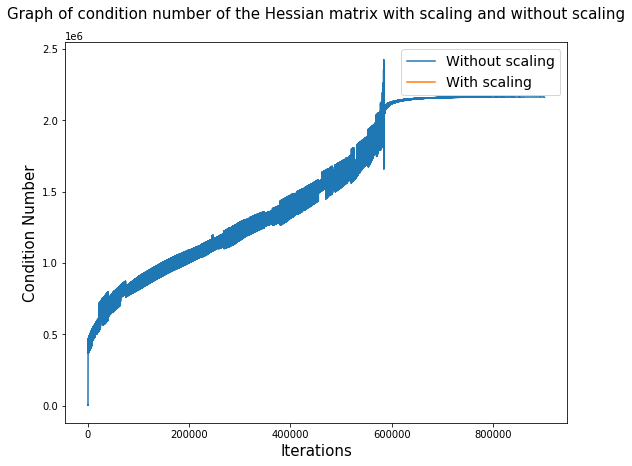

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,7))
plt.plot(condition_number_array,label=r'$ $')
plt.plot(condition_number_array_scaling,label= r'$ $') 
plt.title('Graph of condition number of the Hessian matrix with scaling and without scaling\n',fontsize=15)
plt.xlabel(r'Iterations',fontsize=15)
plt.ylabel(r'Condition Number',fontsize=15)
plt.legend(["Without scaling", "With scaling"],fontsize=14)
plt.show()

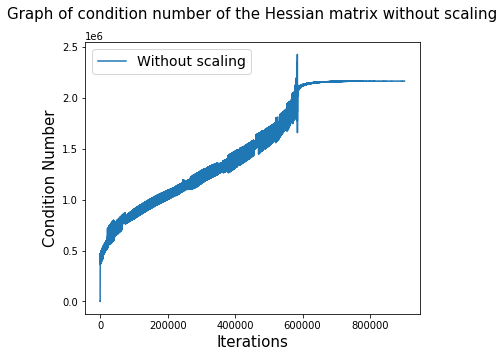

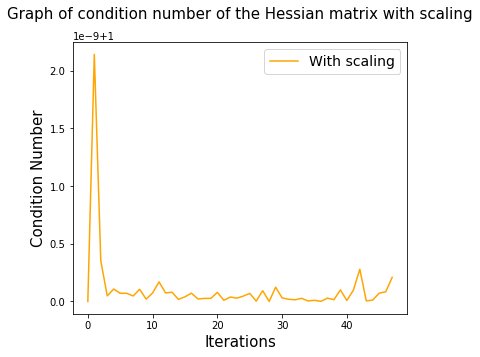

In [20]:
plt.figure(figsize=(6,5))
plt.plot(condition_number_array,label=r'$ $')
plt.title('Graph of condition number of the Hessian matrix without scaling\n',fontsize=15)
plt.ylabel(r'Condition Number',fontsize=15)
plt.xlabel(r'Iterations',fontsize=15)
plt.legend(["Without scaling", "With scaling"],fontsize=14)
plt.show()

plt.figure(figsize=(6,5))
plt.plot(condition_number_array_scaling,label=r'$ $', color = 'orange')
plt.title('Graph of condition number of the Hessian matrix with scaling\n',fontsize=15)
plt.xlabel(r'Iterations',fontsize=15)
plt.ylabel(r'Condition Number',fontsize=15)
plt.legend(["With scaling"],fontsize=14)
plt.show()